### Model Evaluation

This Jupyter Notebook is a demonstration of evaluating a model. We will be comparing the prediction with some test data to evaluate the effectiveness of the model.

#### Step 1

Load the required dependencies.


In [30]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2
Open and parse the CSV file and store the data as variables array data objects.

In [31]:
training_data = pd.read_csv('3.course_specifications_data.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

#### Step 3

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a `LinearRegression` Machine Learning model class and store it in the `my_model` variable as an object, passing a range of parameters to configure the model. Then use the `fit` method from the `LinearRegression` class to fit the model to the training data

In [32]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

####  Step 4
Open and parse the test data CSV file and store the data as variable array data objects.

In [33]:
testing_data = pd.read_csv('6.model_test_and_validate_data.csv', delimiter=',')
x_test = np.array(testing_data.iloc[:,1]).reshape(-1, 1)
y_test = np.array(testing_data.iloc[:,0])

#### Step 5

Plot the test data features and targets to the linear regression model to visually evaluate the model.

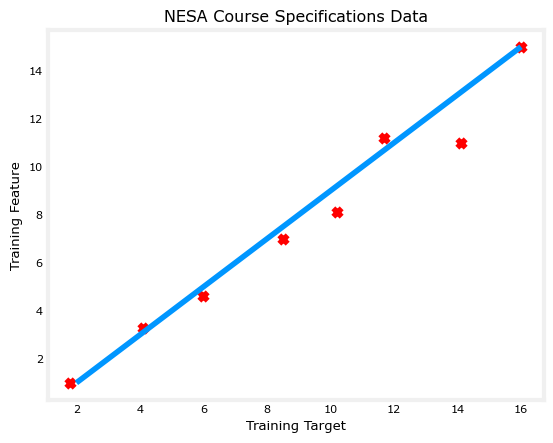

In [34]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [35]:
train_score = my_model.score(x, y)
test_score = my_model.score(x_test, y_test)
print(f'Training data score: {train_score}')
print(f'Testing data score: {test_score}')

Training data score: 1.0
Testing data score: 0.9578584680625496


> [!Note]
> The "Training data score" is a perfect "1.0" because the data provided in the course specifications has a perfect linear relationship.

#### Step 7

Manually calculate and evaluate the 'cost' of the model using the test data.

In [36]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':my_model.predict(x_test),
    'Cost' : y_test - my_model.predict(x_test).round(2)
})
print(table)

   Feature  Target  Predicted result  Cost
0      1.8     1.0               0.8   0.2
1      4.1     3.3               3.1   0.2
2      6.0     4.6               5.0  -0.4
3      8.5     7.0               7.5  -0.5
4     10.2     8.1               9.2  -1.1
5     11.7    11.2              10.7   0.5
6     14.1    11.0              13.1  -2.1
7     16.0    15.0              15.0   0.0


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [37]:
print(f'X Axis intercept: {my_model.intercept_}')
print(f'Coefficient: {my_model.coef_}')

X Axis intercept: -1.0000000000000036
Coefficient: [1.]


#### Step 9

When you are happy with your final model save the model to file.

In [38]:
# save the model to disk
filename = 'my_saved_model.sav'
pickle.dump(my_model, open(filename, 'wb'))